In [3]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

#그래프 한글폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
import os
import pandas as pd

In [7]:
#전체기후날씨데이터(weather.csv) 불러오기
weather = pd.read_csv('weather.csv')

#지점-기후관측소 대조표(key.csv) 불러오기
map_key = pd.read_csv('key.csv')

#일일-지점-상품-판매량 정보(train.csv) 불러오기
sales_rate = pd.read_csv('train.csv')

#일기예보를 위한 날짜 및 지점정보(test.csv) 불러오기


In [6]:
#데이터확인칸

map_key

NameError: name 'map_key' is not defined

In [152]:
#지점별 heat테이블 만들기--------------------------
station_wth = pd.DataFrame(weather,columns=["station_nbr","date","heat"])

def Mto0(s):
    if(type(d)!='int'):
        return 0
    return s


station_heat = station_wth.pivot("date","station_nbr","heat")
station_heat = station_heat.replace(["M",None],0)

station_heat = station_heat.astype(int, errors='ignore')
# station_heat = station_heat.apply(pd.to_numericm errors = 'ignore')


#지점별 avgspeed테이블 만들기-----------------------
station_wth = pd.DataFrame(weather,columns=["station_nbr","date","avgspeed"])


station_speed = station_wth.pivot("date","station_nbr","avgspeed")
station_speed = station_speed.replace(["M",None],0)

station_speed = station_speed.astype(int, errors='ignore')
# station_heat = station_heat.apply(pd.to_numericm errors = 'ignore')

station_speed


station_nbr,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
date,,,,,,,,,,,,,,,,,,,,
2012-01-01,4.6,11.3,10.0,8.2,0,13.8,10.2,10.9,22.5,5.5,4.8,4.8,6.1,11.3,3.8,6.8,5.8,8.9,15.6,10.8
2012-01-02,10.3,13.3,8.2,4.8,0,9.3,6.9,6.7,14.7,11.2,11.1,12.7,6.8,7.4,8.1,10.9,4.8,6.9,18.1,8.6
2012-01-03,11.6,12.8,11.8,4.2,0,5.8,15.9,3.9,9.2,12.1,9.7,13.2,6.3,12.7,13.7,10.9,7.0,9.1,9.2,8.5
2012-01-04,8.3,11.7,4.9,2.2,0,4.7,7.4,2.6,5.2,5.8,3.1,4.2,6.1,7.6,6.4,9.9,3.3,5.5,9.7,4.9
2012-01-05,7.8,11.3,7.6,1.8,0,2.3,12.4,1.0,2.1,8.3,0,5.5,5.0,10.3,5.8,8.1,4.4,2.9,8.5,4.4
2012-01-06,2.4,6.8,9.6,5.4,0,10.8,14.4,8.0,9.5,4.4,2.1,2.6,6.2,12.2,1.8,2.6,7.5,9.1,7.9,8.0
2012-01-07,3.6,9.6,8.9,2.3,0,3.4,10.4,1.7,7.4,3.0,2.3,2.4,5.9,11.8,0.9,3.7,9.4,6.4,7.7,8.1
2012-01-08,6.6,11.0,8.4,3.6,0,8.1,10.8,1.2,1.9,3.1,2.5,1.5,4.6,10.8,7.9,6.8,7.6,4.1,4.5,5.8
2012-01-09,4.0,7.9,7.2,8.2,0,12.5,8.8,9.4,7.5,2.4,1.8,2.3,3.9,10.6,2.9,5.3,5.0,9.0,12.1,10.9


In [137]:
type(station_heat[1][1])


numpy.int32

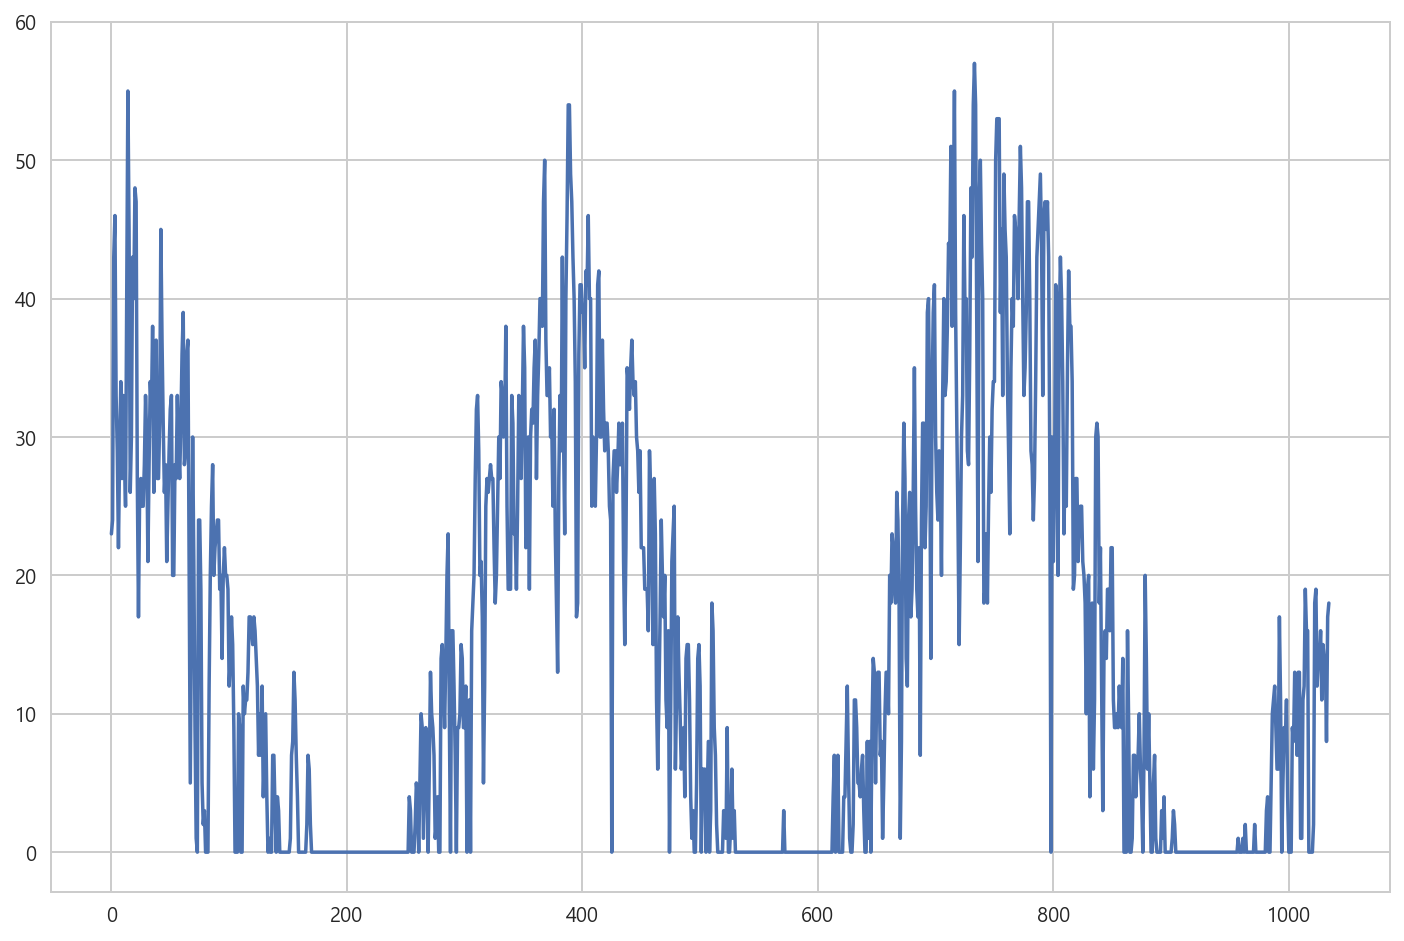

In [163]:
# 지역별 Heat 치 시각화

plt.figure(figsize=(12,8))
y1 = station_heat[1]
y2 = station_heat[18]
y3 = station_heat[20]
plt.plot(range(len(y1)),y1)
plt.yticks([0,10,20,30,40,50,60])
# plt.scatter([range(len(y1)),range(len(y2)),range(len(y3))],[y1,y2,y3],c=["b","g","r"])

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
y1 = station_speed[1]
y2 = station_speed[18]
y3 = station_speed[20]
plt.plot(range(len(y1)),y1)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
# plt.scatter([range(len(y1)),range(len(y2)),range(len(y3))],[y1,y2,y3],c=["b","g","r"])

plt.show()